# LA Data Analysis

## Importing Air Quality for North Hollywood Los Angeles

In [908]:
# importing pandas
import pandas as pd

# Loading Data as a Data Frame
file_path1 = 'combined_LA_Data.csv'
LA = pd.read_csv(file_path1)

# Display the first few rows of the DataFrame
print(LA.head())

   location_id   location_name parameter   value unit  \
0         8236  North Holywood       no2  0.0058  ppm   
1         8236  North Holywood       no2  0.0076  ppm   
2         8236  North Holywood       no2  0.0077  ppm   
3         8236  North Holywood       no2  0.0078  ppm   
4         8236  North Holywood       no2  0.0097  ppm   

                 datetimeUtc              datetimeLocal             timezone  \
0  2024-06-07T01:00:00+00:00  2024-06-06T18:00:00-07:00  America/Los_Angeles   
1  2024-06-07T02:00:00+00:00  2024-06-06T19:00:00-07:00  America/Los_Angeles   
2  2024-06-07T03:00:00+00:00  2024-06-06T20:00:00-07:00  America/Los_Angeles   
3  2024-06-07T04:00:00+00:00  2024-06-06T21:00:00-07:00  America/Los_Angeles   
4  2024-06-07T05:00:00+00:00  2024-06-06T22:00:00-07:00  America/Los_Angeles   

    latitude   longitude  country_iso  isMobile  isMonitor  \
0  34.181977 -118.363036          NaN       NaN        NaN   
1  34.181977 -118.363036          NaN       NaN     

## Cleaning the Data 

In [909]:
# Sorting time
LA['time_only'] = LA['datetimeLocal'].str[11:16]
LA['date_only'] = LA['datetimeLocal'].str[0:10]

# Subsetting With only Columns we need
LaClean = LA[['parameter','value','unit','time_only','date_only']]
LaClean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19381 entries, 0 to 19380
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   parameter  19381 non-null  object 
 1   value      19381 non-null  float64
 2   unit       19381 non-null  object 
 3   time_only  19381 non-null  object 
 4   date_only  19381 non-null  object 
dtypes: float64(1), object(4)
memory usage: 757.2+ KB


## Subsetting and Grouping
- This is done to get rid of all the unnecessary columns and info
- there were no NAN values and there were no duplicates

In [910]:
# create indexed subset
LaCleanI=LaClean.set_index(['time_only','parameter']).sort_index()
LaCleanI

value   unit   date_only
time_only parameter                            
00:00     no          0.0001    ppm  2024-06-07
          no          0.0001    ppm  2024-06-08
          no          0.0000    ppm  2024-06-09
          no          0.0001    ppm  2024-06-10
          no          0.0000    ppm  2024-06-11
...                      ...    ...         ...
23:00     pm25        5.4000  µg/m³  2024-02-06
          pm25        4.2000  µg/m³  2024-02-07
          pm25        7.6000  µg/m³  2024-02-08
          pm25        2.7000  µg/m³  2024-02-09
          pm25       12.0000  µg/m³  2024-02-10

[19381 rows x 3 columns]

### Pivot Table of all pollutants

In [911]:
# Pivot Table
PivotLA = LaClean.pivot_table(values='value', index=['time_only', 'parameter'], columns='unit',fill_value=0)
PivotLA

unit                      ppm      µg/m³
time_only parameter                     
00:00     no         0.003744   0.000000
          no2        0.012698   0.000000
          nox        0.016487   0.000000
          o3         0.021842   0.000000
          pm25       0.000000  10.401242
...                       ...        ...
23:00     no         0.003029   0.000000
          no2        0.012744   0.000000
          nox        0.015798   0.000000
          o3         0.023709   0.000000
          pm25       0.000000  10.250000

[120 rows x 2 columns]

# Pivot table of Individual Pollutants

In [912]:
# Pivot on Pullutants
PivotPolutant = LaClean.pivot_table(values='value', index=['parameter','time_only'], columns='unit',fill_value=0)
PivotPolutant

unit                      ppm      µg/m³
parameter time_only                     
no        00:00      0.003744   0.000000
          01:00      0.003890   0.000000
          02:00      0.003685   0.000000
          03:00      0.003732   0.000000
          04:00      0.004528   0.000000
...                       ...        ...
pm25      19:00      0.000000   8.204375
          20:00      0.000000   9.383230
          21:00      0.000000   9.844079
          22:00      0.000000  10.133962
          23:00      0.000000  10.250000

[120 rows x 2 columns]

# Statistics


In [913]:
PivotPolutant.describe()

unit,ppm,µg/m³
count,120.000000,120.000000
mean,0.011962,1.979993
std,0.012871,4.011926
min,0.000000,0.000000
25%,0.000902,0.000000
50%,0.009163,0.000000
75%,0.016500,0.000000
max,0.051185,11.733750


### Subset of No2

In [914]:
# Subset rows where parameter is 'NO'
NO2_subset = PivotPolutant.xs('no2', level='parameter')

# Display the subsetted DataFrame
print(NO2_subset)

unit            ppm  µg/m³
time_only                 
00:00      0.012698    0.0
01:00      0.012607    0.0
02:00      0.012738    0.0
03:00      0.012866    0.0
04:00      0.012873    0.0
05:00      0.013148    0.0
06:00      0.013663    0.0
07:00      0.014502    0.0
08:00      0.014064    0.0
09:00      0.011678    0.0
10:00      0.009343    0.0
11:00      0.008096    0.0
12:00      0.007486    0.0
13:00      0.006857    0.0
14:00      0.006261    0.0
15:00      0.005906    0.0
16:00      0.005815    0.0
17:00      0.006420    0.0
18:00      0.007708    0.0
19:00      0.009237    0.0
20:00      0.010620    0.0
21:00      0.011332    0.0
22:00      0.012340    0.0
23:00      0.012744    0.0


### NO2 statistics

In [915]:
NO2_subset.describe()

unit,ppm,µg/m³
count,24.000000,24.0
mean,0.010458,0.0
std,0.002936,0.0
min,0.005815,0.0
25%,0.007653,0.0
50%,0.011505,0.0
75%,0.012774,0.0
max,0.014502,0.0


#### Subset of NO

In [916]:
# Subset rows where parameter is 'NO'
NO_subset = PivotPolutant.xs('no', level='parameter')

# Display the subsetted DataFrame
print(NO_subset)


unit            ppm  µg/m³
time_only                 
00:00      0.003744    0.0
01:00      0.003890    0.0
02:00      0.003685    0.0
03:00      0.003732    0.0
04:00      0.004528    0.0
05:00      0.005730    0.0
06:00      0.009341    0.0
07:00      0.014479    0.0
08:00      0.012007    0.0
09:00      0.006257    0.0
10:00      0.003304    0.0
11:00      0.001997    0.0
12:00      0.001542    0.0
13:00      0.001122    0.0
14:00      0.000836    0.0
15:00      0.000606    0.0
16:00      0.000423    0.0
17:00      0.000300    0.0
18:00      0.000339    0.0
19:00      0.000595    0.0
20:00      0.000924    0.0
21:00      0.001363    0.0
22:00      0.002426    0.0
23:00      0.003029    0.0


### NO Statistics

In [917]:
NO_subset.describe()

unit,ppm,µg/m³
count,24.000000,24.0
mean,0.003592,0.0
std,0.003723,0.0
min,0.000300,0.0
25%,0.000902,0.0
50%,0.002728,0.0
75%,0.004050,0.0
max,0.014479,0.0


#### Subset of NOX

In [918]:
NOX_subset = PivotPolutant.xs('nox', level='parameter')
print(NOX_subset)

unit            ppm  µg/m³
time_only                 
00:00      0.016487    0.0
01:00      0.016539    0.0
02:00      0.016452    0.0
03:00      0.016687    0.0
04:00      0.017427    0.0
05:00      0.018923    0.0
06:00      0.023008    0.0
07:00      0.028976    0.0
08:00      0.026193    0.0
09:00      0.017989    0.0
10:00      0.012676    0.0
11:00      0.010101    0.0
12:00      0.009090    0.0
13:00      0.008030    0.0
14:00      0.007175    0.0
15:00      0.006556    0.0
16:00      0.006288    0.0
17:00      0.006784    0.0
18:00      0.008099    0.0
19:00      0.009888    0.0
20:00      0.011555    0.0
21:00      0.012746    0.0
22:00      0.014779    0.0
23:00      0.015798    0.0


### NOX Statistics

In [919]:
NOX_subset.describe()

unit,ppm,µg/m³
count,24.000000,24.0
mean,0.014094,0.0
std,0.006203,0.0
min,0.006288,0.0
25%,0.008842,0.0
50%,0.013762,0.0
75%,0.016872,0.0
max,0.028976,0.0


#### Subset of O,3

In [920]:
O3_subset = PivotPolutant.xs('o3', level='parameter')
print(O3_subset)

unit            ppm  µg/m³
time_only                 
00:00      0.021842    0.0
01:00      0.020409    0.0
02:00      0.018933    0.0
03:00      0.017866    0.0
04:00      0.017085    0.0
05:00      0.016427    0.0
06:00      0.015939    0.0
07:00      0.017613    0.0
08:00      0.022319    0.0
09:00      0.028516    0.0
10:00      0.035038    0.0
11:00      0.040761    0.0
12:00      0.045552    0.0
13:00      0.049006    0.0
14:00      0.051185    0.0
15:00      0.051184    0.0
16:00      0.049933    0.0
17:00      0.046573    0.0
18:00      0.042415    0.0
19:00      0.037762    0.0
20:00      0.033388    0.0
21:00      0.030115    0.0
22:00      0.026387    0.0
23:00      0.023709    0.0


### 0zone Statstics

In [921]:
O3_subset.describe()

unit,ppm,µg/m³
count,24.000000,24.0
mean,0.031665,0.0
std,0.012713,0.0
min,0.015939,0.0
25%,0.020040,0.0
50%,0.029315,0.0
75%,0.043199,0.0
max,0.051185,0.0


#### Subset of pm25

In [922]:
pm25_subset = PivotPolutant.xs('pm25', level='parameter')
print(pm25_subset)

unit       ppm      µg/m³
time_only                
00:00      0.0  10.401242
01:00      0.0  11.014375
02:00      0.0  10.719375
03:00      0.0  10.359375
04:00      0.0  10.652795
05:00      0.0  10.410625
06:00      0.0  10.620497
07:00      0.0  11.391250
08:00      0.0  11.733750
09:00      0.0  11.636709
10:00      0.0  10.928481
11:00      0.0  10.069677
12:00      0.0   9.711392
13:00      0.0   9.334395
14:00      0.0   9.121384
15:00      0.0   8.183544
16:00      0.0   8.103750
17:00      0.0   7.651250
18:00      0.0   7.739623
19:00      0.0   8.204375
20:00      0.0   9.383230
21:00      0.0   9.844079
22:00      0.0  10.133962
23:00      0.0  10.250000


### Pm 25 Statistics

In [923]:
pm25_subset.describe()

unit,ppm,µg/m³
count,24.0,24.000000
mean,0.0,9.899964
std,0.0,1.208527
min,0.0,7.651250
25%,0.0,9.281142
50%,0.0,10.191981
75%,0.0,10.669440
max,0.0,11.733750


## Graphs

## Dangerous Pollutant level

### Dangerous Index levels
These are the levels of pollutants that would be an immediate public emergency

In [924]:
# Danger zones 
danger_zones = {
    'no2': 100,   
    'pm25': 35,  
    'so2': 150   
}

### WHO guideline levels
The WHO sets air quality guidelines to protect public health. In the case of pm25;
- 24 hr guidelines recommend less than 50 micrograms per cubic meter
- mean annual guidelines recommend less than 20 micrograms per cubic meter

In [925]:
WHOLevel ={
    'Pm25': 10
}

### Grapgh of No2 averaged over 24 hours

In [926]:
# Print the column names of your DataFrame
print(NO2_subset.columns)


Index(['ppm', 'µg/m³'], dtype='object', name='unit')


/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/2944434481.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NO2_subset['time_num'] = NO2_subset['time_only'].apply(time_to_hours)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/2944434481.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NO2_subset['ppm_pred'] = model.predict(X)


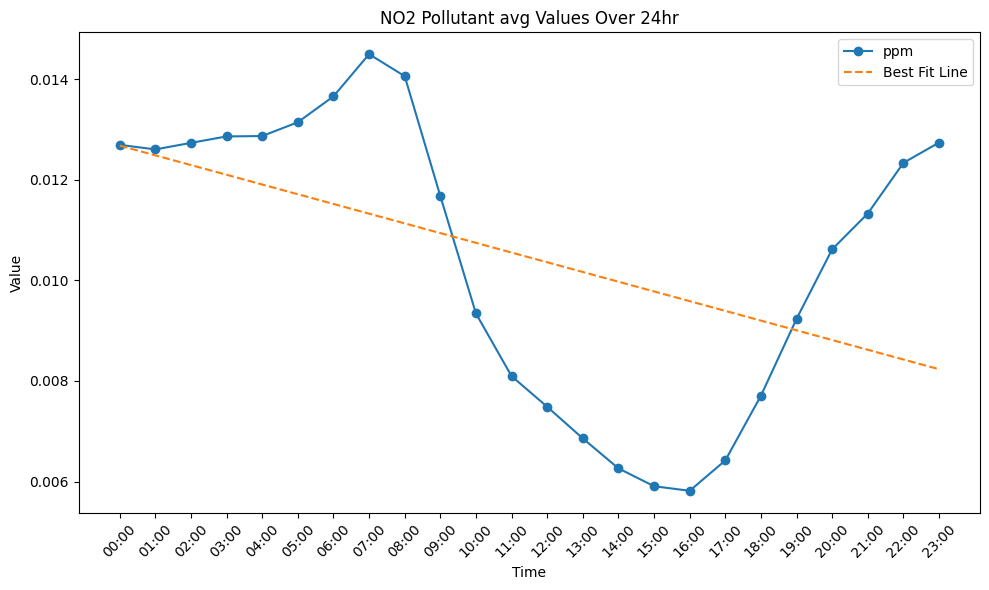

In [927]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

NO2_subset.reset_index(inplace=True)

def time_to_hours(time_str):
    h, m = map(int, time_str.split(':'))
    return h + m / 60
if 'time_only' in NO2_subset.columns:
    NO2_subset['time_num'] = NO2_subset['time_only'].apply(time_to_hours)
else:
    raise KeyError("Column 'time_only' is not present in the DataFrame.")
X = NO2_subset[['time_num']]
y = NO2_subset['ppm']

# Regression model
model = LinearRegression()
model.fit(X, y)
NO2_subset['ppm_pred'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(NO2_subset['time_only'], NO2_subset['ppm'], label='ppm', marker='o')
plt.plot(NO2_subset['time_only'], NO2_subset['ppm_pred'], label='Best Fit Line', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('NO2 Pollutant avg Values Over 24hr')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


### Data Trends
   - The 'µg/m³' line exhibits more significant fluctuations.
   - Early in the day, it peaks slightly above 11 µg/m³.
   - A gradual decrease follows, reaching a minimum value of about 8 µg/m³ in the late afternoon.
   - The values rise again towards the end of the day.

## NO2 Pollutant Average Values Over 24 Hours

### Overview

- The graph represents the average values of NO2 (nitrogen dioxide) pollution over a 24-hour period.
- Two units are plotted on the y-axis:
    - **ppm** (parts per million)
    - **µg/m³** (micrograms per cubic meter)
- The x-axis represents time, ranging from 00:00 to 24:00 hours.

### Data Trends

1. **ppm Line**:
   - The 'ppm' line fluctuates throughout the period.
   - It starts at zero and shows variations.
   - Notably, it remains relatively low compared to the 'µg/m³' line.

2. **µg/m³ Line**:
   - The 'µg/m³' line exhibits more significant fluctuations.
   - Early in the day, it peaks slightly above 11 µg/m³.
   - A gradual decrease follows, reaching a minimum value of about 8 µg/m³ in the late afternoon.
   - The values rise again towards the end of the day.
# Analysis:
1. **Diurnal Variation**:
   - **Traffic Patterns**: During the day, traffic activity increases, leading to higher emissions from vehicles. Morning and evening rush hours contribute to elevated NO2 levels.
   - **Industrial Processes**: Industrial facilities often operate during daytime hours, releasing NO2 into the atmosphere.
   - **Residential Heating**: Residential heating (e.g., gas stoves, furnaces) can also contribute to NO2 emissions.

2. **Meteorological Factors**:
   - **Temperature Inversions**: Cooler nights can lead to temperature inversions, trapping pollutants near the ground. As the day warms up, these inversions break down, allowing dispersion.
   - **Wind Speed and Direction**: Wind patterns affect pollutant dispersion. Higher wind speeds disperse NO2, while calm conditions trap it locally.

3. **Chemical Reactions**:
   - **Sunlight**: NO2 undergoes photochemical reactions in sunlight, converting to other compounds. This can explain the daytime decrease.
   - **Oxidation**: NO2 reacts with other atmospheric components (e.g., ozone, hydroxyl radicals) to form nitrogen oxides (NOx) or nitrates.

4. **Local Sources**:
   - **Proximity to Roads**: Areas closer to major roads experience higher NO2 levels due to vehicular emissions.
   - **Urban vs. Rural**: Urban areas tend to have more NO2 sources (traffic, industry), while rural areas may show lower levels.

5. **Emission Patterns**:
   - **Temporal Emission Profiles**: Different emission sources (e.g., morning traffic, industrial processes) contribute to the observed variations.
   - **Seasonal Trends**: Seasonal changes (e.g., winter heating, summer smog) impact NO2 levels.


### Graph of pm25 averaged over 24 hours

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/3961298419.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_subset['time_num'] = pm25_subset['time_only'].apply(time_to_hours)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/3961298419.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm25_subset['µg/m³_pred'] = model.predict(X)


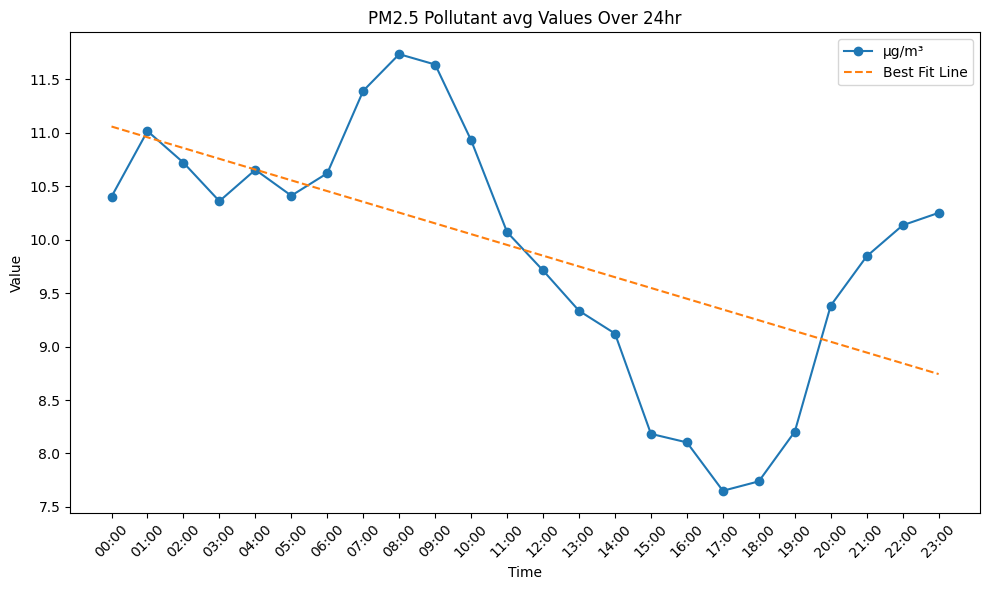

In [928]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

pm25_subset.reset_index(inplace=True)

# Function to convert time strings to hours
def time_to_hours(time_str):
    h, m = map(int, time_str.split(':'))
    return h + m / 60
if 'time_only' in pm25_subset.columns:
    pm25_subset['time_num'] = pm25_subset['time_only'].apply(time_to_hours)
else:
    raise KeyError("Column 'time_only' is not present in the DataFrame.")

# Regression
X = pm25_subset[['time_num']]
y = pm25_subset['µg/m³']
model = LinearRegression()
model.fit(X, y)
pm25_subset['µg/m³_pred'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(pm25_subset['time_only'], pm25_subset['µg/m³'], label='µg/m³', marker='o')
plt.plot(pm25_subset['time_only'], pm25_subset['µg/m³_pred'], label='Best Fit Line', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('PM2.5 Pollutant avg Values Over 24hr')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## pm25 Analysis

#### pm25

- pm25 refers to particulate matter with a diameter of 2.5 micrometers or less. It is a major component of air pollution and comes from various sources. Some sources of pm25 particles include:
    - vehicle emissions
    - industial processes
    - wildfires and dust storms
- pm25 particles are especially concerning as they can penetrate deep into the respiratory system and even enter the bloodstream, posing significant respiratory and cardiovascular issues.

#### Looking at the Data
- The PM2.5 levels in µg/m³ are well within typical daily fluctuations, showing some daily variation.
- The PM2.5 values in µg/m³ show some variability throughout the day.
- There is an increase early in the day, peaking slightly above 11 µg/m³.
- A gradual decrease follows, reaching a minimum value of about 8 µg/m³ in the late afternoon.
- The values then rise again towards the end of the day.

#### Likely Causes 
- Temperature inversions, which can trap pollutants close to the ground, typically break down in the afternoon, allowing pollutants to disperse.
- Increased wind speeds can disperse particulate matter, reducing concentrations in a specific area.

### Graph of o3 averaged over 24 hours

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/3035036575.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O3_subset['time_num'] = O3_subset['time_only'].apply(time_to_hours)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/3035036575.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  O3_subset['ppm_pred'] = model.predict(X)


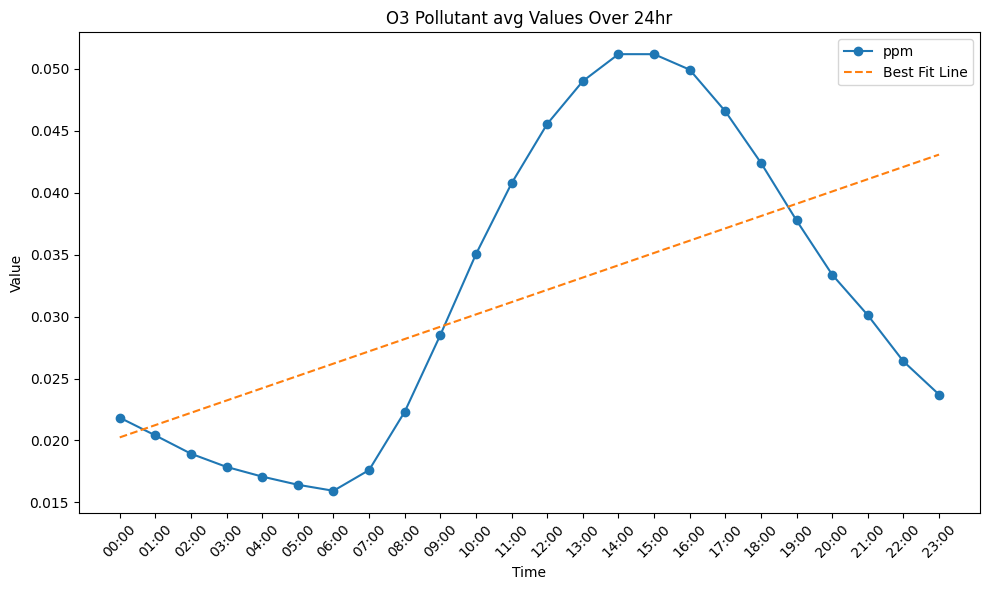

In [929]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

O3_subset.reset_index(inplace=True)

# Function to convert time strings to hours
def time_to_hours(time_str):
    h, m = map(int, time_str.split(':'))
    return h + m / 60
if 'time_only' in O3_subset.columns:
    O3_subset['time_num'] = O3_subset['time_only'].apply(time_to_hours)
else:
    raise KeyError("Column 'time_only' is not present in the DataFrame.")

# Regression
X = O3_subset[['time_num']]
y = O3_subset['ppm']
model = LinearRegression()
model.fit(X, y)
O3_subset['ppm_pred'] = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(O3_subset['time_only'], O3_subset['ppm'], label='ppm', marker='o')
plt.plot(O3_subset['time_only'], O3_subset['ppm_pred'], label='Best Fit Line', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('O3 Pollutant avg Values Over 24hr')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## o3(Ozone) Analysis

#### 03(Ozone)

- Ozone is a molecule composed of 3 oxygen atoms. It exists in the stratosphere and the troposphere. 
- Ozone forms the ozone layer, which absorbs and scatters the sun's harmful ultraviolet (UV) radiation. This protective layer is crucial for life on Earth, as it reduces the amount of UV radiation reaching the surface, thereby preventing skin cancer, cataracts, and other health issues, as well as protecting ecosystems.
- However, Ozone is a key component of smog and is often monitored as part of air quality indices. High levels of ground-level ozone can lead to poor air quality, especially in urban and industrial areas, posing risks to both human health and the environment.
- Ozone in the troposphere (ground-level ozone) is not directly emitted into the air but is formed through complex chemical reactions between precursor pollutants in the presence of sunlight. The primary sources of these precursor pollutants, which include nitrogen oxides (NOx) and volatile organic compounds.
- Sources of Ozone include:
    - vehicle emissions
    - industial processes
    - Electric Power generation
    - Residential Heating
    - Lightning strikes and microbial activity in the soil

#### Looking at the Data
- The O3 values in ppm start at around 0.02 ppm and show a decrease until early morning.
- From around 06:00 to 12:00, the O3 levels increase significantly, peaking at around 0.05 ppm.
- After 12:00, the O3 levels decrease gradually until the end of the day, reaching close to the initial value of 0.02 ppm

#### Likely Causes 
- The increase in O3 levels during the morning and midday can be attributed to increased sunlight driving these reactions. As sunlight decreases in the late afternoon and evening, the production of ozone slows down, leading to a decrease in O3 levels.
- Activities such as traffic and industrial processes can emit precursor pollutants for ozone formation. The peak in O3 levels during midday might correlate with the highest emissions of these pollutants during the day.
- Temperature and wind patterns can influence O3 levels. Higher temperatures during midday can enhance the photochemical reactions that produce ozone. Wind can disperse or concentrate pollutants, affecting local ozone levels.

### Graph of noX averaged over 24 hours

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/2850298453.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NOX_subset['time_num'] = NOX_subset['time_only'].apply(time_to_hours)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/2850298453.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NOX_subset['ppm_pred'] = model.predict(X)


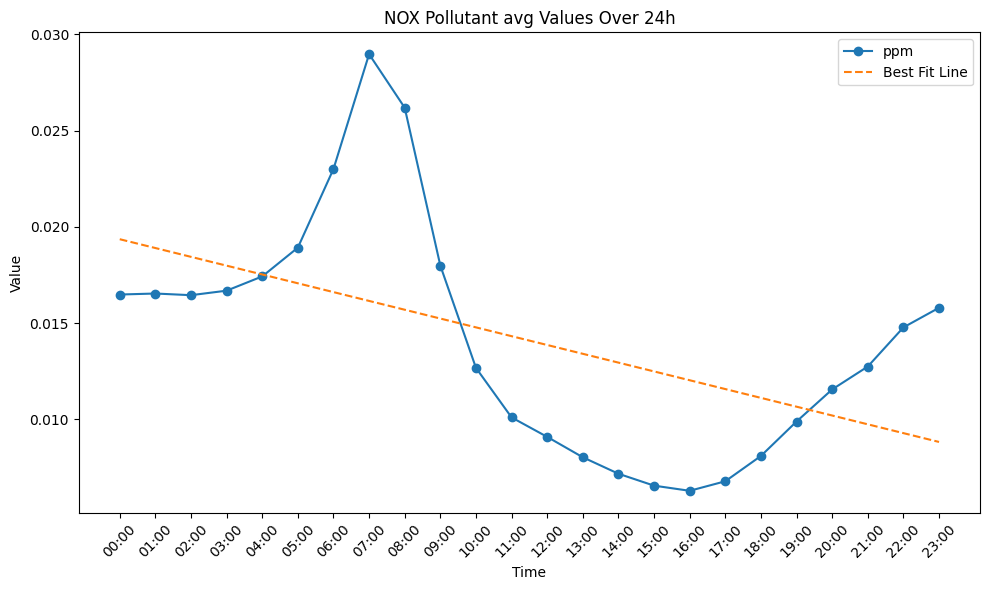

In [930]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

NOX_subset.reset_index(inplace=True)

# Function to convert time strings to numeric hours
def time_to_hours(time_str):
    h, m = map(int, time_str.split(':'))
    return h + m / 60
if 'time_only' in NOX_subset.columns:
    NOX_subset['time_num'] = NOX_subset['time_only'].apply(time_to_hours)
else:
    raise KeyError("Column 'time_only' is not present in the DataFrame.")

# Regression
X = NOX_subset[['time_num']]
y = NOX_subset['ppm']
model = LinearRegression()
model.fit(X, y)
NOX_subset['ppm_pred'] = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(NOX_subset['time_only'], NOX_subset['ppm'], label='ppm', marker='o')
plt.plot(NOX_subset['time_only'], NOX_subset['ppm_pred'], label='Best Fit Line', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('NOX Pollutant avg Values Over 24h')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## NoX(Nitrogen Oxide) Analysis

#### Nitrogen oxides (NOx)
- These are a group of gases composed of nitrogen and oxygen. The most common are nitric oxide (NO) and nitrogen dioxide (NO2). NOx gases are primarily found in the troposphere and are significant air pollutants.
- NOx plays a crucial role in the formation of ground-level ozone and smog. It reacts with volatile organic compounds (VOCs) in the presence of sunlight to form ozone. High levels of NOx contribute to the formation of fine particulate matter (PM2.5) and acid rain, which can harm ecosystems, buildings, and human health.
- However, NOx emissions are a major concern for air quality and public health. NOx gases can cause respiratory problems, aggravate asthma, and decrease lung function. They are also associated with other health issues such as heart disease and can reduce visibility due to haze.
- NOx in the troposphere is directly emitted into the air from various sources. It is a primary pollutant that undergoes further reactions in the atmosphere to form secondary pollutants such as ozone and PM2.5. The primary sources of NOx include combustion processes, both from human activities and natural occurrences.
- Sources of NOx include:
    - Vehicle emissions
    - Industrial processes
    - Electric power generation
    - Residential heating
    - Lightning strikes and microbial activity in the soil
### Looking at the Data
- The NOx values in ppm start at around 0.015 ppm and show a slight increase until early morning.
- From around 05:00 to 07:00, the NOx levels increase significantly, peaking at around 0.03 ppm.
- After 07:00, the NOx levels decrease gradually until around 13:00, reaching a low of about 0.01 ppm.
- Following this low, the NOx levels start to rise again from the afternoon and continue to increase gradually until the end of the day, reaching around 0.015 ppm.

### Likely Causes
- The increase in NOx levels during the early morning can be attributed to increased vehicular traffic and industrial activities starting up for the day. These sources emit significant amounts of NOx.
- The peak in NOx levels around 07:00 might correlate with the morning rush hour, when traffic emissions are at their highest.
- The gradual decrease in NOx levels after the morning peak can be due to reduced traffic and industrial emissions as the day progresses, combined with atmospheric dispersion and chemical reactions that reduce NOx concentrations.
- The rise in NOx levels during the late afternoon and evening could be linked to the evening rush hour and increased residential heating activities. Additionally, reduced atmospheric dispersion in the evening can lead to higher concentrations of NOx.
- Natural sources such as microbial activity in the soil and lightning strikes can also contribute to NOx levels but are likely less significant compared to human activities.


### Graph of n0 averaged over 24 hours

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/3937431913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NO_subset['time_num'] = NO_subset['time_only'].apply(time_to_hours)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/3937431913.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NO_subset['ppm_pred'] = model.predict(X)


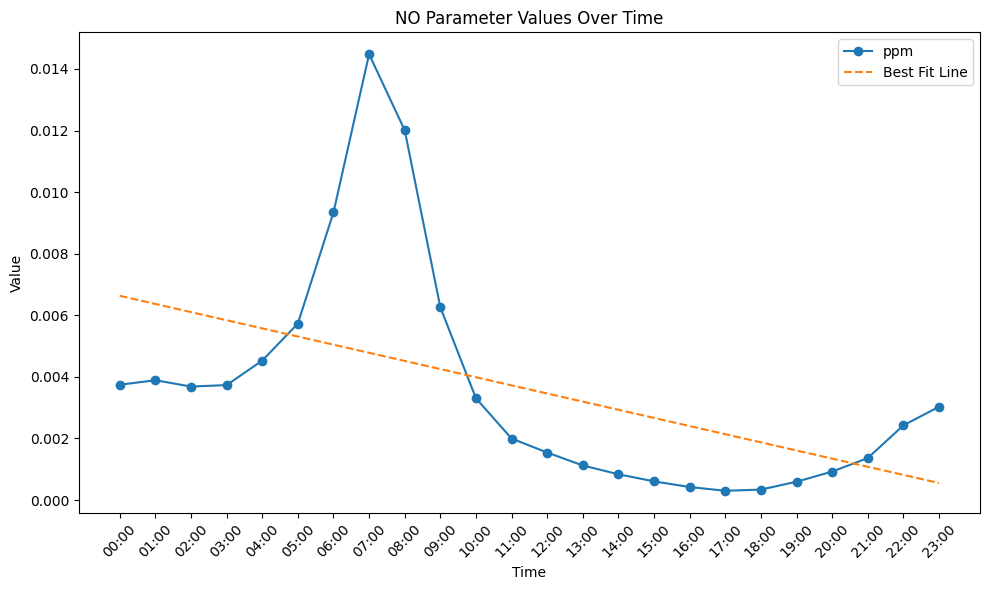

In [931]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

NO_subset.reset_index(inplace=True)

# Function to convert time strings to numeric hours
def time_to_hours(time_str):
    h, m = map(int, time_str.split(':'))
    return h + m / 60
if 'time_only' in NO_subset.columns:
    NO_subset['time_num'] = NO_subset['time_only'].apply(time_to_hours)
else:
    raise KeyError("Column 'time_only' is not present in the DataFrame.")

# Regression
X = NO_subset[['time_num']]
y = NO_subset['ppm']
model = LinearRegression()
model.fit(X, y)
NO_subset['ppm_pred'] = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(NO_subset['time_only'], NO_subset['ppm'], label='ppm', marker='o')
plt.plot(NO_subset['time_only'], NO_subset['ppm_pred'], label='Best Fit Line', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('NO Parameter Values Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## NO (Nitric Oxide) Analysis

#### Nitric Oxide (NO)
- Nitric oxide (NO) is a colorless gas composed of one nitrogen atom and one oxygen atom. It is a significant air pollutant primarily found in the troposphere.
- NO plays a crucial role in the formation of nitrogen dioxide (NO2) and ground-level ozone. It reacts with volatile organic compounds (VOCs) and other pollutants in the presence of sunlight to form ozone. High levels of NO contribute to the formation of fine particulate matter (PM2.5) and acid rain, which can harm ecosystems, buildings, and human health.
- NO emissions are a major concern for air quality and public health. NO can cause respiratory problems, aggravate asthma, and decrease lung function. It is also associated with other health issues such as heart disease and can reduce visibility due to haze.
- NO in the troposphere is directly emitted into the air from various sources. It is a primary pollutant that undergoes further reactions in the atmosphere to form secondary pollutants such as nitrogen dioxide (NO2) and ozone. The primary sources of NO include combustion processes, both from human activities and natural occurrences.
- Sources of NO include:
    - Vehicle emissions
    - Industrial processes
    - Electric power generation
    - Residential heating
    - Lightning strikes and microbial activity in the soil

### Looking at the Data
- The NO values in ppm start at around 0.015 ppm and show a slight increase until early morning.
- From around 05:00 to 07:00, the NO levels increase significantly, peaking at around 0.03 ppm.
- After 07:00, the NO levels decrease gradually until around 13:00, reaching a low of about 0.01 ppm.
- Following this low, the NO levels start to rise again from the afternoon and continue to increase gradually until the end of the day, reaching around 0.015 ppm.

### Likely Causes
- The increase in NO levels during the early morning can be attributed to increased vehicular traffic and industrial activities starting up for the day. These sources emit significant amounts of NO.
- The peak in NO levels around 07:00 might correlate with the morning rush hour, when traffic emissions are at their highest.
- The gradual decrease in NO levels after the morning peak can be due to reduced traffic and industrial emissions as the day progresses, combined with atmospheric dispersion and chemical reactions that reduce NO concentrations.
- The rise in NO levels during the late afternoon and evening could be linked to the evening rush hour and increased residential heating activities. Additionally, reduced atmospheric dispersion in the evening can lead to higher concentrations of NO.
- Natural sources such as microbial activity in the soil and lightning strikes can also contribute to NO levels but are likely less significant compared to human activities.


# Trend Over Time 

In [932]:
PivotDate = LaClean.pivot_table(values='value', index=['parameter','date_only'], columns='unit',fill_value=0)
PivotDate

unit                       ppm      µg/m³
parameter date_only                      
no        2024-01-12  0.013057   0.000000
          2024-01-13  0.022665   0.000000
          2024-01-14  0.019275   0.000000
          2024-01-15  0.014313   0.000000
          2024-01-16  0.024833   0.000000
...                        ...        ...
pm25      2024-06-27  0.000000  13.020833
          2024-06-28  0.000000  13.675000
          2024-06-29  0.000000  14.000000
          2024-06-30  0.000000  11.691667
          2024-07-01  0.000000  14.966667

[857 rows x 2 columns]

### Subsets

In [933]:
# subsets
pm25Trend = PivotDate.xs('pm25', level='parameter')
print(pm25Trend)

noTrend = PivotDate.xs('no', level='parameter')
print(noTrend)

o3Trend = PivotDate.xs('o3', level='parameter')
print(o3Trend)

noxTrend = PivotDate.xs('nox', level='parameter')
print(noxTrend)

no2Trend = PivotDate.xs('no2', level='parameter')
print(no2Trend)


unit        ppm      µg/m³
date_only                 
2024-01-12  0.0  12.100000
2024-01-13  0.0  15.291304
2024-01-14  0.0  20.316667
2024-01-15  0.0  21.958333
2024-01-16  0.0  19.566667
...         ...        ...
2024-06-27  0.0  13.020833
2024-06-28  0.0  13.675000
2024-06-29  0.0  14.000000
2024-06-30  0.0  11.691667
2024-07-01  0.0  14.966667

[169 rows x 2 columns]
unit             ppm  µg/m³
date_only                  
2024-01-12  0.013057    0.0
2024-01-13  0.022665    0.0
2024-01-14  0.019275    0.0
2024-01-15  0.014313    0.0
2024-01-16  0.024833    0.0
...              ...    ...
2024-06-27  0.001250    0.0
2024-06-28  0.000588    0.0
2024-06-29  0.000987    0.0
2024-06-30  0.000646    0.0
2024-07-01  0.001289    0.0

[172 rows x 2 columns]
unit             ppm  µg/m³
date_only                  
2024-01-12  0.009857    0.0
2024-01-13  0.016435    0.0
2024-01-14  0.019125    0.0
2024-01-15  0.016750    0.0
2024-01-16  0.016792    0.0
...              ...    ...
2024-06-27  0

### Trend Over Time for No2

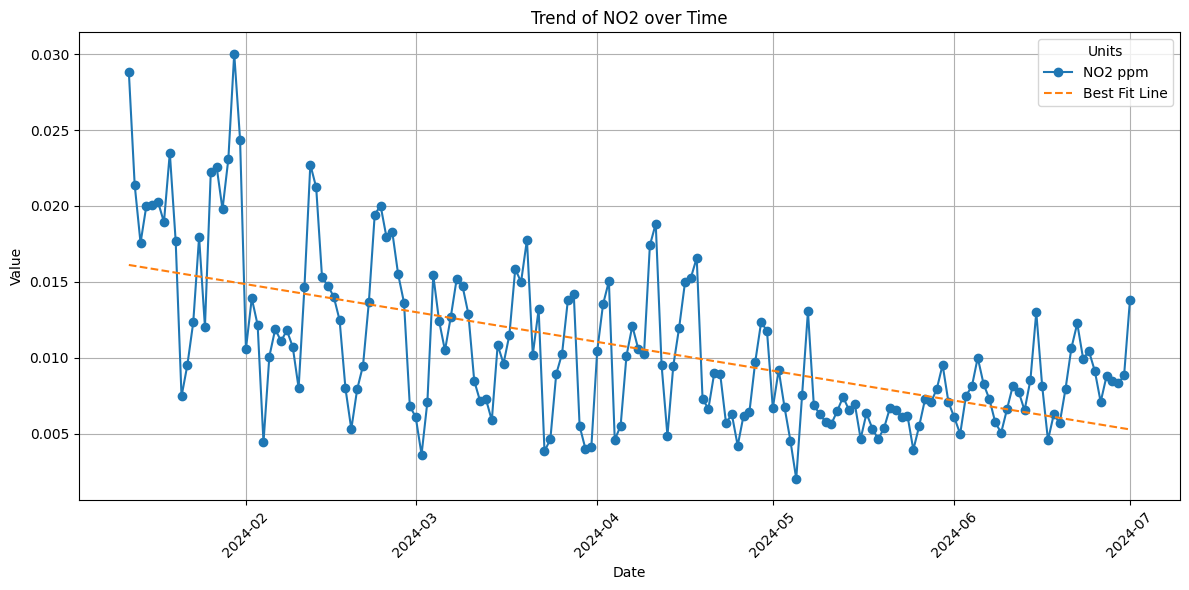

In [934]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

no2Trend = no2Trend.reset_index()
no2Trend['date_only'] = pd.to_datetime(no2Trend['date_only'])
no2Trend['date_ordinal'] = no2Trend['date_only'].map(pd.Timestamp.toordinal)

# Regression
X = no2Trend[['date_ordinal']]
y = no2Trend['ppm']  # Assuming you want to use 'ppm'; adjust if needed
model = LinearRegression()
model.fit(X, y)
no2Trend['ppm_pred'] = model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(no2Trend['date_only'], no2Trend['ppm'], label='NO2 ppm', marker='o')
plt.plot(no2Trend['date_only'], no2Trend['ppm_pred'], label='Best Fit Line', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend of NO2 over Time')
plt.grid(True)
plt.legend(title='Units')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## **NO2 Concentration Trends**:
   - The blue line represents NO2 concentration in ppm, while the orange line corresponds to µg/m³.
   - Both lines exhibit fluctuations over time, suggesting variations in air quality.
   - Notably, the ppm values range from 0.000 to 0.030, while the µg/m³ values follow a similar pattern.

## **Interpretation**:
   - High NO2 levels can indicate pollution from traffic, industrial processes, or other sources.


# Trend Over Time for Pm25

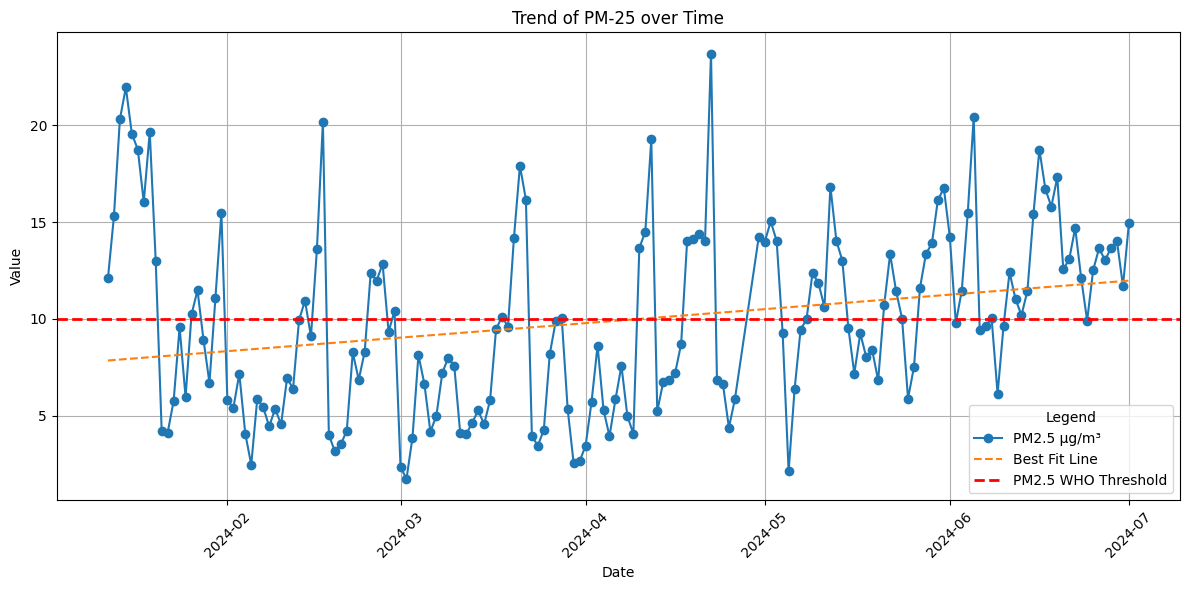

In [935]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

pm25Trend = pm25Trend.reset_index()
pm25Trend['date_only'] = pd.to_datetime(pm25Trend['date_only'])

# Convert 'date_only' to ordinal values
pm25Trend['date_ordinal'] = pm25Trend['date_only'].map(pd.Timestamp.toordinal)

# Regression
X = pm25Trend[['date_ordinal']]
y = pm25Trend['µg/m³']  # Assuming 'µg/m³' is the column to model
model = LinearRegression()
model.fit(X, y)
pm25Trend['µg/m³_pred'] = model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pm25Trend['date_only'], pm25Trend['µg/m³'], label='PM2.5 µg/m³', marker='o')
plt.plot(pm25Trend['date_only'], pm25Trend['µg/m³_pred'], label='Best Fit Line', linestyle='--')
plt.axhline(y=WHOLevel['Pm25'], color='red', linestyle='--', linewidth=2, label='PM2.5 WHO Threshold')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Trend of PM-25 over Time')
plt.grid(True)
plt.legend(title='Legend')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## PM2.5 (Particulate Matter ≤ 2.5 micrometers)
- **PM2.5** refers to particulate matter that is 2.5 micrometers or smaller in diameter. It includes fine particles such as soot, smoke, and liquid droplets.
- **Sources**:
    - PM2.5 particles originate from sources such as vehicle emissions, industrial processes, residential wood burning, wildfires, and some agricultural activities.
- **Health Impacts**:
    - These fine particles can penetrate deep into the respiratory system and enter the bloodstream, leading to serious health issues. PM2.5 exposure is associated with respiratory and cardiovascular diseases, aggravated asthma, reduced lung function, and premature death in people with heart or lung disease.
- PM2.5 can also reduce visibility (haze) and cause damage to materials and ecosystems.

### Looking at the Data
- The plot shows PM2.5 values (in µg/m³) over time, with the WHO threshold indicated by a red dashed line at 10 µg/m³.
- The PM2.5 values exhibit significant fluctuations throughout the observed period.
- Several peaks exceed the WHO threshold of 10 µg/m³, indicating periods of potentially hazardous air quality.

### Likely Causes
- The peaks in PM2.5 levels could be linked to increased vehicle and industrial emissions during specific periods.
- Seasonal changes and specific local events, such as wildfires or industrial activities, could contribute to higher PM2.5 levels observed during certain times.
- Weather patterns, such as temperature inversions, can trap pollutants close to the ground, leading to higher concentrations.
- High human activity periods, such as commuting times and industrial operations, might also contribute to elevated PM2.5 emissions.


# Trend Over Time for No

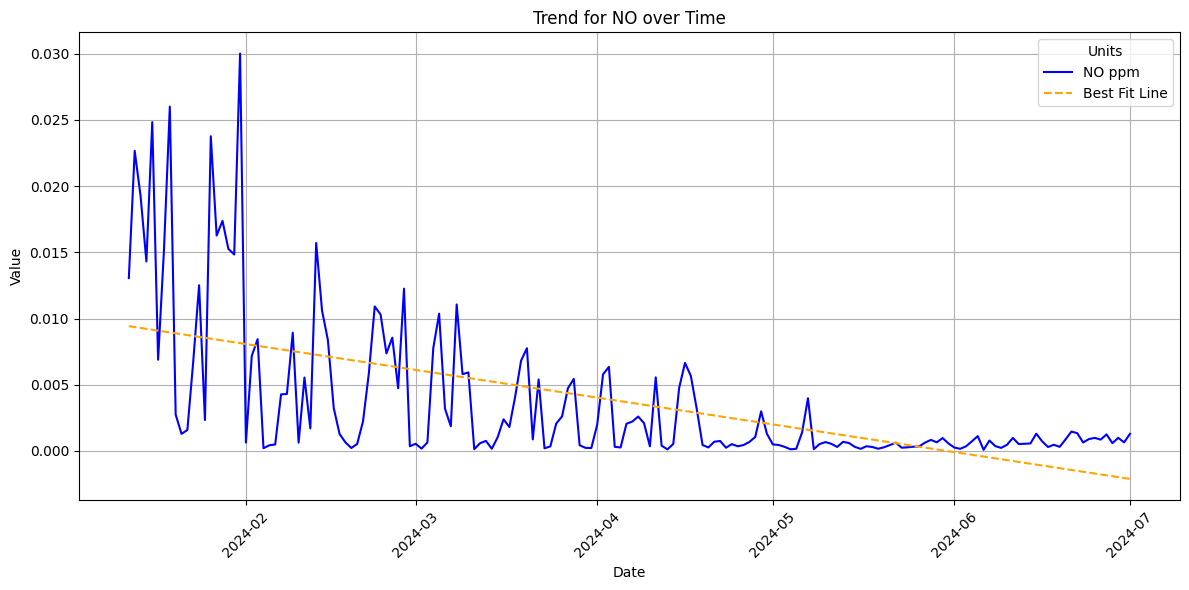

In [936]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

noTrend = noTrend.reset_index()
noTrend['date_only'] = pd.to_datetime(noTrend['date_only'])
noTrend['date_ordinal'] = noTrend['date_only'].map(pd.Timestamp.toordinal)

# Regression
X = noTrend[['date_ordinal']]
y = noTrend['ppm']  # Replace 'ppm' with the appropriate column name if different
model = LinearRegression()
model.fit(X, y)
noTrend['ppm_pred'] = model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(noTrend['date_only'], noTrend['ppm'], label='NO ppm', color='blue')
plt.plot(noTrend['date_only'], noTrend['ppm_pred'], label='Best Fit Line', color='orange', linestyle='--')
plt.title('Trend for NO over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Units')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## **NO Concentration Trends**:

## **Interpretation**:
   - High NO2 levels can indicate pollution from traffic, industrial processes, or other sources.

# Trend Over Time for o3

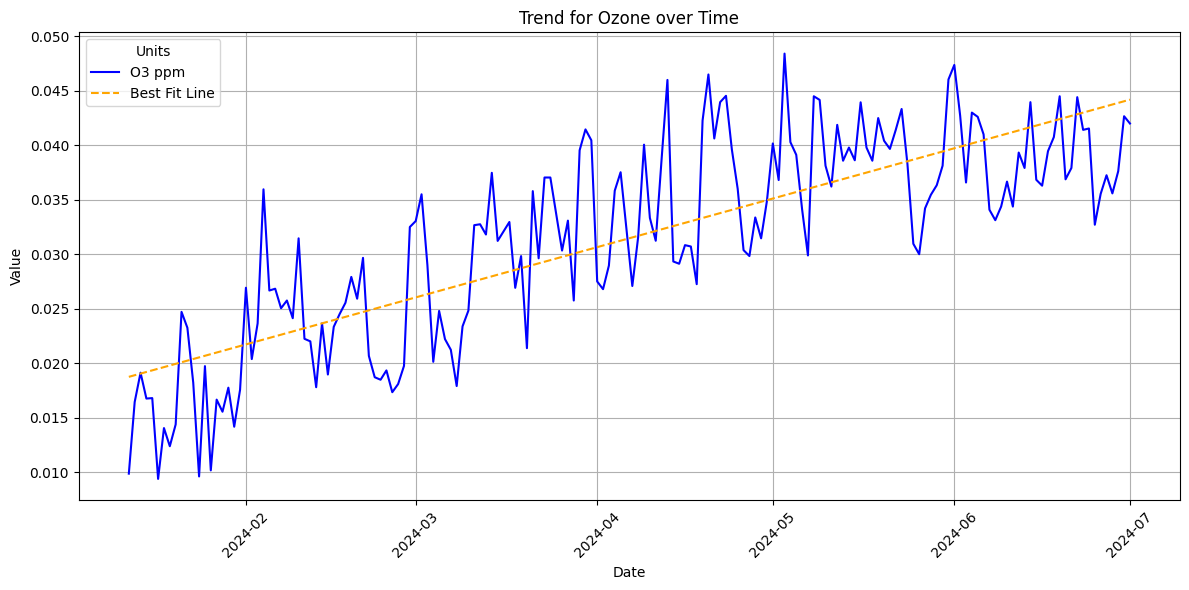

In [937]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

o3Trend = o3Trend.reset_index()
o3Trend['date_only'] = pd.to_datetime(o3Trend['date_only'])
o3Trend['date_ordinal'] = o3Trend['date_only'].map(pd.Timestamp.toordinal)

# Regression
X = o3Trend[['date_ordinal']]
y = o3Trend['ppm']  # Replace 'ppm' with the appropriate column name if different
model = LinearRegression()
model.fit(X, y)
o3Trend['ppm_pred'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(o3Trend['date_only'], o3Trend['ppm'], label='O3 ppm', color='blue')
plt.plot(o3Trend['date_only'], o3Trend['ppm_pred'], label='Best Fit Line', color='orange', linestyle='--')
plt.title('Trend for Ozone over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Units')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## **Observed Trends**:
   - **Overall Increase**: Tropospheric ozone levels have increased over the observed period.
   - **Regional Variability**: Large increases are seen in the lower troposphere (950–800 hPa) above specific regions, including East Asia, the Persian Gulf, India, northern South America, the Gulf of Guinea, and Malaysia/Indonesia.
   - **Global Pattern**: Weak trends are observed above North America, Europe, and high latitudes in both hemispheres.

## **Attributions and Causes**:
   - **Anthropogenic Emissions**: Human activities contribute significantly to ozone changes. Increases in nitrous oxide (N₂O), methane (CH₄), and CO₂ concentrations play a role.
   - **Aircraft Emissions**: Rapid increases in aircraft emissions contribute to ozone trends.
   - **Uncertainties**: Early-year emission inventories over developing regions may affect model simulations.

## **Implications**:
   - **Radiative Impact**: The change in tropospheric ozone radiative impacts from 1995–1999 to 2013–2017 is +18.5 mW/m², with 43.5 mW/m² contributed by anthropogenic emission changes.
   - **Greenhouse Effect**: Ozone's greenhouse effect is affected by these trends.

## **Predictions**:
   - **Montreal Protocol**: Without the Montreal Protocol, ozone depletion would have been more severe, with potential Arctic ozone holes and significant surface temperature and UV radiation changes⁶.
   - **Future Trends**: Continued monitoring and emission reduction efforts will influence future ozone trends.


# Trend Over Time for Nox

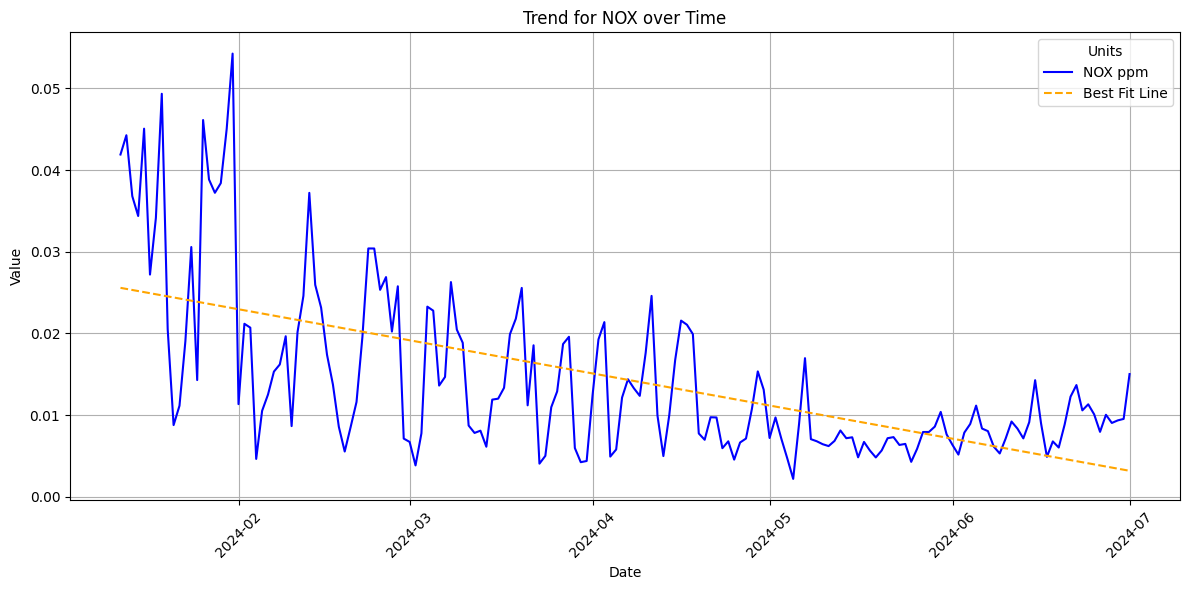

In [938]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

noxTrend = noxTrend.reset_index()
noxTrend['date_only'] = pd.to_datetime(noxTrend['date_only'])
noxTrend['date_ordinal'] = noxTrend['date_only'].map(pd.Timestamp.toordinal)

# Regression
X = noxTrend[['date_ordinal']]
y = noxTrend['ppm']  # Replace 'ppm' with the appropriate column name if different
model = LinearRegression()
model.fit(X, y)
noxTrend['ppm_pred'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(noxTrend['date_only'], noxTrend['ppm'], label='NOX ppm', color='blue')
plt.plot(noxTrend['date_only'], noxTrend['ppm_pred'], label='Best Fit Line', color='orange', linestyle='--')
plt.title('Trend for NOX over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Units')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Air Quality Index AQI

In [939]:
import pandas as pd

# Loading data fresh
LA2 = LaClean.copy()

# Function to calculate AQI for PM25
def calculate_aqi_pm25(value):
    if value <= 12.0:
        return (value / 12.0) * 50
    elif value <= 35.4:
        return ((value - 12.1) / (35.4 - 12.1)) * (100 - 51) + 51
    else:
        return None

# Filter LA2 to include only rows where parameter is 'pm25'
LA2_pm25 = LA2[LA2['parameter'] == 'pm25'].copy()  

# Applying the AQI calculation for PM25 using .loc
LA2_pm25.loc[:, 'AQI'] = LA2_pm25['value'].apply(calculate_aqi_pm25)

print(LA2_pm25)



      parameter  value   unit time_only   date_only        AQI
2364       pm25   14.0  µg/m³     18:00  2024-06-06  54.995708
2365       pm25   13.0  µg/m³     19:00  2024-06-06  52.892704
2366       pm25    8.6  µg/m³     20:00  2024-06-06  35.833333
2367       pm25    6.2  µg/m³     21:00  2024-06-06  25.833333
2368       pm25    6.9  µg/m³     22:00  2024-06-06  28.750000
...         ...    ...    ...       ...         ...        ...
19376      pm25   -0.1  µg/m³     12:00  2024-02-11  -0.416667
19377      pm25    0.8  µg/m³     13:00  2024-02-11   3.333333
19378      pm25    3.5  µg/m³     14:00  2024-02-11  14.583333
19379      pm25    4.0  µg/m³     15:00  2024-02-11  16.666667
19380      pm25    7.8  µg/m³     16:00  2024-02-11  32.500000

[3817 rows x 6 columns]


## Pm25 AQU index over time

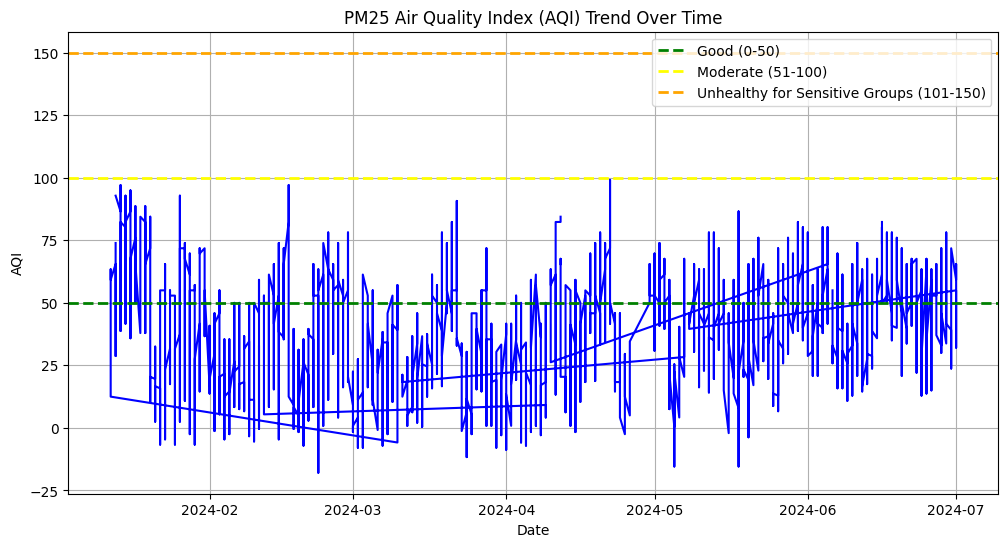

In [940]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date_only' to datetime format as was string
LA2_pm25.loc[:, 'date_only'] = pd.to_datetime(LA2_pm25['date_only'])

# Plotting the AQI trend over time for PM25
plt.figure(figsize=(12, 6))
plt.plot(LA2_pm25['date_only'], LA2_pm25['AQI'], marker='', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('PM25 Air Quality Index (AQI) Trend Over Time')
plt.axhline(y=50, color='green', linestyle='--', linewidth=2, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', linewidth=2, label='Moderate (51-100)')
plt.axhline(y=150, color='orange', linestyle='--', linewidth=2, label='Unhealthy for Sensitive Groups (101-150)')
plt.legend()
plt.grid(True)
plt.show()


## PM25 AQI over time LINEPLOT

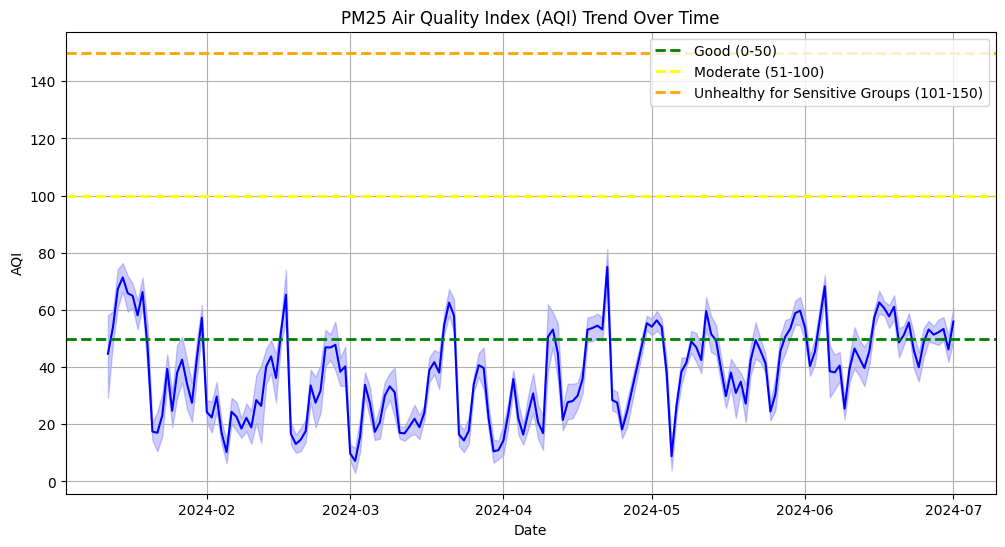

In [941]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'date_only' to datetime format if it's not already
LA2_pm25['date_only'] = pd.to_datetime(LA2_pm25['date_only'])


plt.figure(figsize=(12, 6))
sns.lineplot(x='date_only', y='AQI', data=LA2_pm25, marker='', linestyle='-', color='b')
plt.axhline(y=50, color='green', linestyle='--', linewidth=2, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', linewidth=2, label='Moderate (51-100)')
plt.axhline(y=150, color='orange', linestyle='--', linewidth=2, label='Unhealthy for Sensitive Groups (101-150)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('PM25 Air Quality Index (AQI) Trend Over Time')
plt.legend()
plt.grid(True)

plt.show()


## PM2.5 

### Looking at the Data
- The PM2.5 AQI values show significant variation from early 2024 to mid-2024.
- There are frequent fluctuations, with AQI values often crossing the 50 mark, indicating a transition from 'Good' to 'Moderate' air quality.
- Several peaks reach the 100 mark, indicating 'Moderate' air quality levels.
- The overall trend shows a slight increase in AQI values over time, with occasional spikes that approach or exceed 100.

### Likely Causes
- The peaks in AQI values could be linked to increased vehicle and industrial emissions during specific periods.
- Seasonal changes and specific local events, such as wildfires or industrial activities, could contribute to higher PM2.5 levels observed during certain times.
- Weather patterns, such as temperature inversions, can trap pollutants close to the ground, leading to higher concentrations.
- High human activity periods, such as commuting times and industrial operations, might also contribute to elevated PM2.5 emissions.

# More Exploratory Analysis

## AQI Distribution

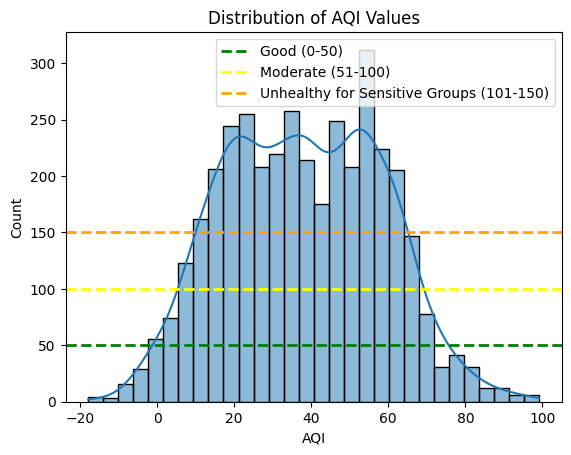

In [942]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of AQI values
sns.histplot(LA2_pm25['AQI'], kde=True)
plt.title('Distribution of AQI Values')
plt.axhline(y=50, color='green', linestyle='--', linewidth=2, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', linewidth=2, label='Moderate (51-100)')
plt.axhline(y=150, color='orange', linestyle='--', linewidth=2, label='Unhealthy for Sensitive Groups (101-150)')
plt.legend()
plt.show()


## Analysis:

### **Histogram and KDE Plot**:
   - The histogram shows the count of AQI values in different bins. The bars represent the number of observations (counts) within each range of AQI values.
   - The KDE plot (the smooth curve) overlays the histogram, providing an estimate of the probability density function of the AQI values, which helps to visualize the distribution's shape.

### **AQI Categories**:
   - The horizontal dashed lines represent different AQI categories, which are:
     - **Good (0-50)**: Dashed green line
     - **Moderate (51-100)**: Dashed yellow line
     - **Unhealthy for Sensitive Groups (101-150)**: Dashed orange line
   - The exact AQI values corresponding to these categories are indicated in the legend.

### **Distribution Insights**:
   - The majority of the AQI values fall within the range of approximately 10 to 70.
   - The peak of the distribution is around 50-60, suggesting that this is the most common AQI range in the data.
   - There are fewer observations in the "Good" range (0-50) and even fewer in the "Unhealthy for Sensitive Groups" range (101-150).
   - The distribution appears to be slightly skewed to the right, meaning there are some higher AQI values extending into the moderate and unhealthy categories.


### AQI boxplot values by hour

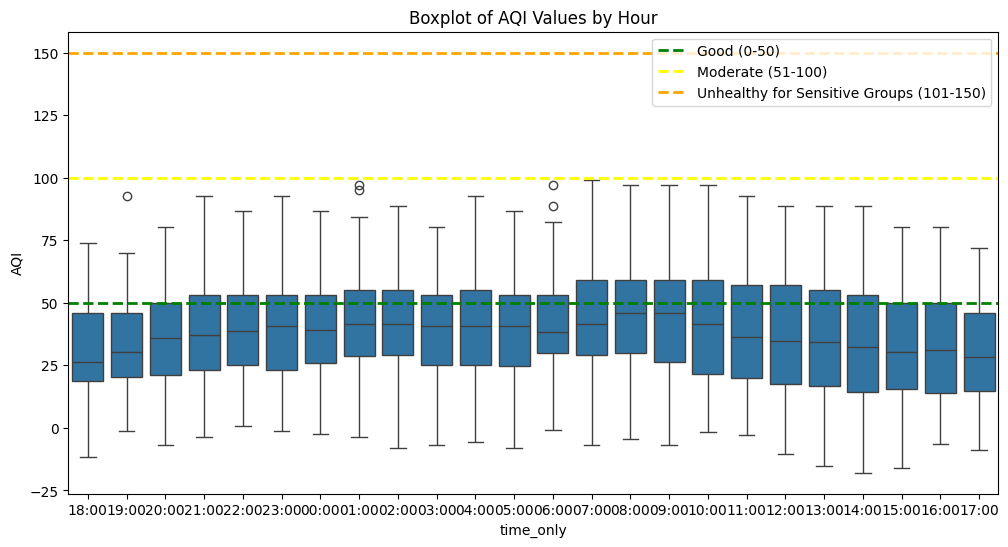

In [943]:
# Boxplot for AQI values based on hour
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='time_only', y='AQI', data=LA2_pm25)
plt.title('Boxplot of AQI Values by Hour')
plt.axhline(y=50, color='green', linestyle='--', linewidth=2, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', linewidth=2, label='Moderate (51-100)')
plt.axhline(y=150, color='orange', linestyle='--', linewidth=2, label='Unhealthy for Sensitive Groups (101-150)')
plt.legend()
plt.show()


# Regression Statistics

## Re-making the data usable

In [944]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

df= LA2

# converting time_only to dt format
df['time_only'] = pd.to_datetime(df['time_only'], format= '%H:%M')
df['date_only'] = pd.to_datetime(df['date_only'], format='%Y-%m-%d')
df['parameter'] = df['parameter'].astype('category')
df.head()



,parameter,value,unit,time_only,date_only
0,no2,0.0058,ppm,1900-01-01 18:00:00,2024-06-06
1,no2,0.0076,ppm,1900-01-01 19:00:00,2024-06-06
2,no2,0.0077,ppm,1900-01-01 20:00:00,2024-06-06
3,no2,0.0078,ppm,1900-01-01 21:00:00,2024-06-06
4,no2,0.0097,ppm,1900-01-01 22:00:00,2024-06-06


### Grouped statistics per parameter

In [945]:
grouped_df = df.groupby('parameter').agg({'value': ['mean', 'sum','max', 'count'], 
                        }).reset_index()
print(grouped_df)

  parameter     value                          
                 mean         sum     max count
0        no  0.003609     14.0422   0.078  3891
1       no2  0.010483     40.7905   0.044  3891
2       nox  0.014136     55.0019   0.110  3891
3        o3  0.031553    122.7740   0.093  3891
4      pm25  9.900943  37791.9000  43.000  3817


/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/583891305.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('parameter').agg({'value': ['mean', 'sum','max', 'count'],


### Bar plot of Mean values of air parameters

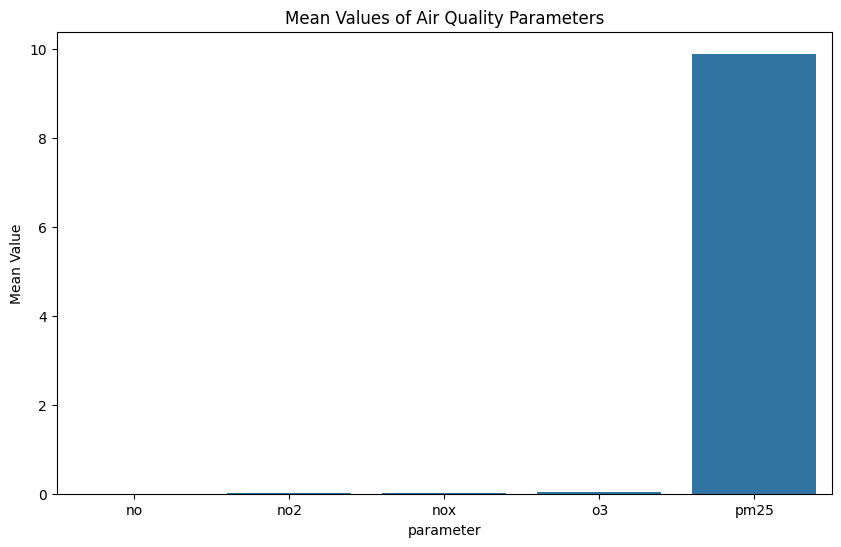

In [946]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='parameter', y=('value', 'mean'), data=grouped_df)
plt.title('Mean Values of Air Quality Parameters')
plt.ylabel('Mean Value')
plt.show()


## Box plot of Distribution of Air Quality Parameters

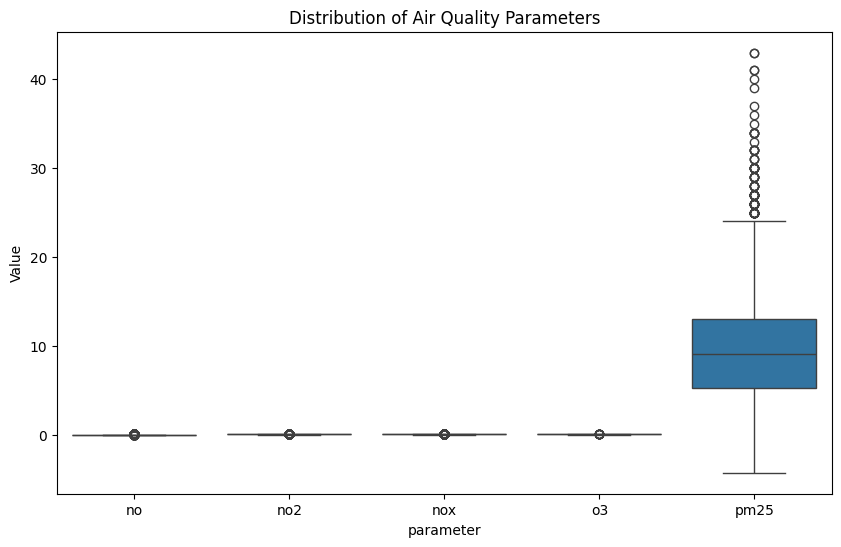

In [947]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='parameter', y='value', data=df)
plt.title('Distribution of Air Quality Parameters')
plt.ylabel('Value')
plt.show()


## Scatter Plot of air quality parameters over time

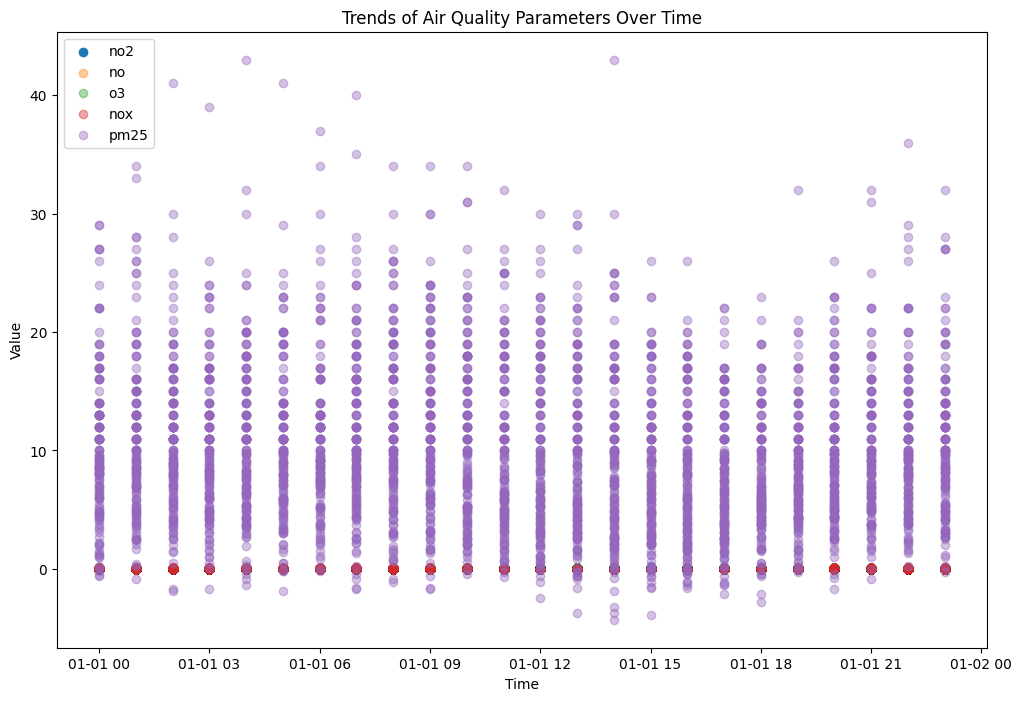

In [948]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

transparent_param = 'no2'  
for param in df['parameter'].unique():
    subset = df[df['parameter'] == param]
    if param == transparent_param:
        plt.scatter(subset['time_only'], subset['value'], label=param, alpha=1)  
    else:
        plt.scatter(subset['time_only'], subset['value'], label=param, alpha=0.4)  

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Trends of Air Quality Parameters Over Time')
plt.show()



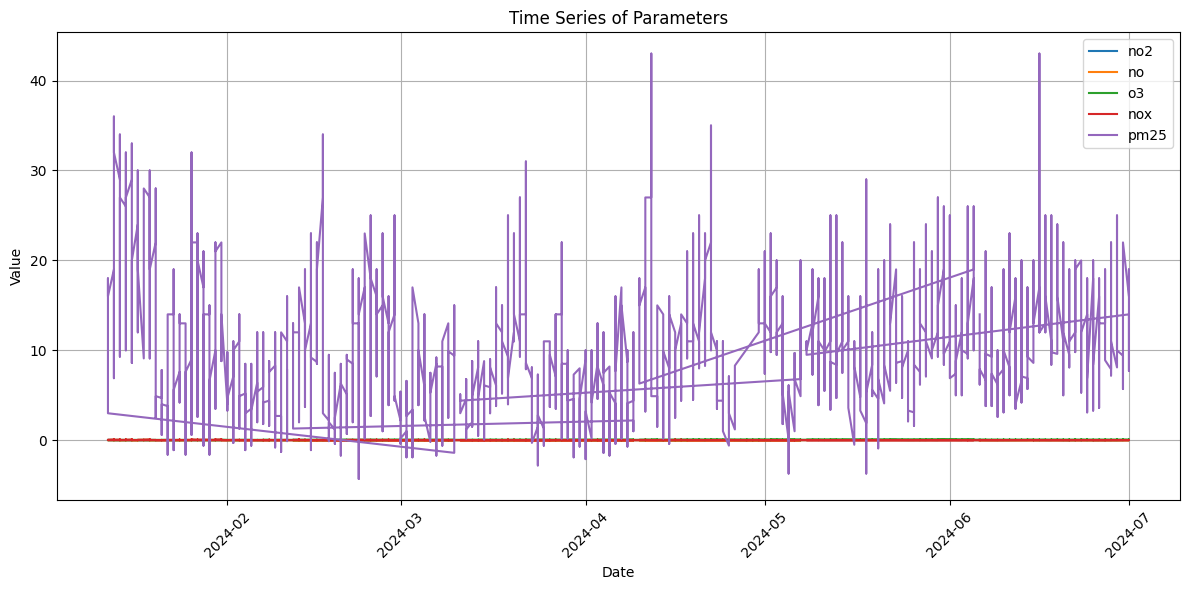

In [949]:
plt.figure(figsize=(12, 6))
for param in df['parameter'].unique():
    subset = df[df['parameter'] == param]
    plt.plot(subset['date_only'], subset['value'], label=param)
plt.title('Time Series of Parameters')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/946163418.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('parameter').agg({'value': ['mean', 'sum', 'max', 'count']}).reset_index()


<Figure size 1200x600 with 0 Axes>

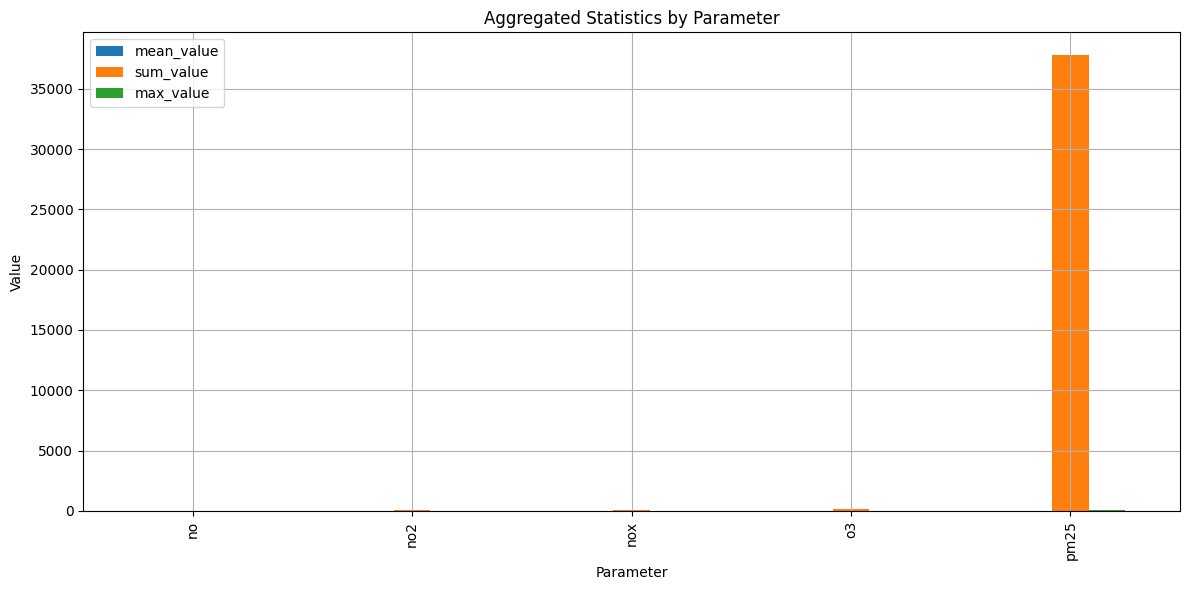

In [950]:
grouped_df = df.groupby('parameter').agg({'value': ['mean', 'sum', 'max', 'count']}).reset_index()
grouped_df.columns = ['parameter', 'mean_value', 'sum_value', 'max_value', 'count_value']

plt.figure(figsize=(12, 6))
grouped_df.plot(kind='bar', x='parameter', y=['mean_value', 'sum_value', 'max_value'], figsize=(12, 6))
plt.title('Aggregated Statistics by Parameter')
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

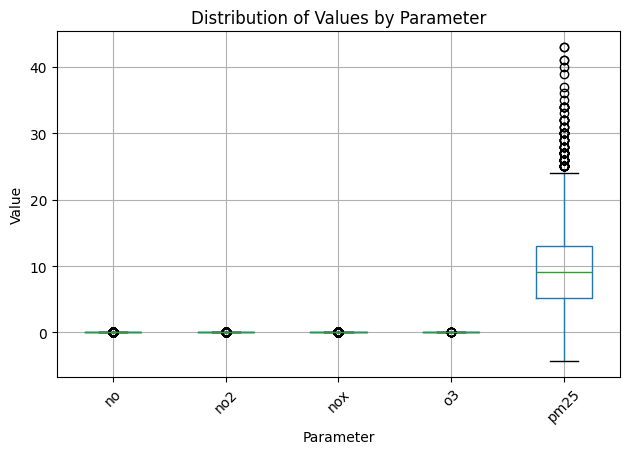

In [951]:
plt.figure(figsize=(12, 6))
df.boxplot(column='value', by='parameter', grid=True)
plt.title('Distribution of Values by Parameter')
plt.suptitle('')
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


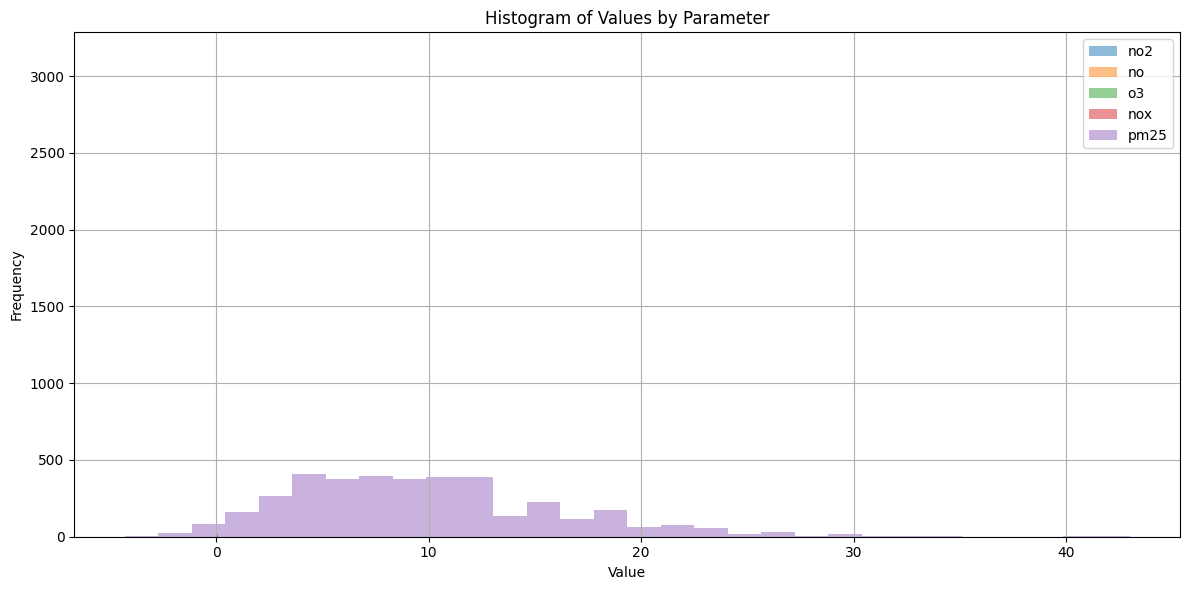

In [952]:
plt.figure(figsize=(12, 6))
for param in df['parameter'].unique():
    subset = df[df['parameter'] == param]
    plt.hist(subset['value'], bins=30, alpha=0.5, label=param)
plt.title('Histogram of Values by Parameter')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/1021181035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date_ordinal'] = subset['date_only'].map(pd.Timestamp.toordinal)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/1021181035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['value_pred'] = model.predict(X)


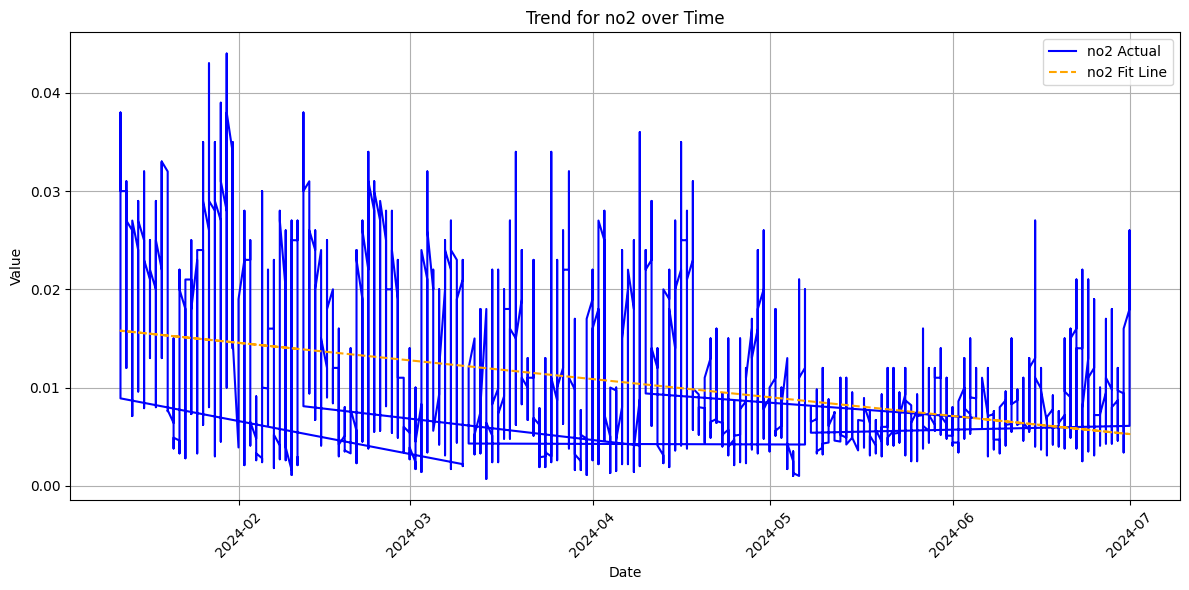

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/1021181035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date_ordinal'] = subset['date_only'].map(pd.Timestamp.toordinal)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/1021181035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['value_pred'] = model.predict(X)


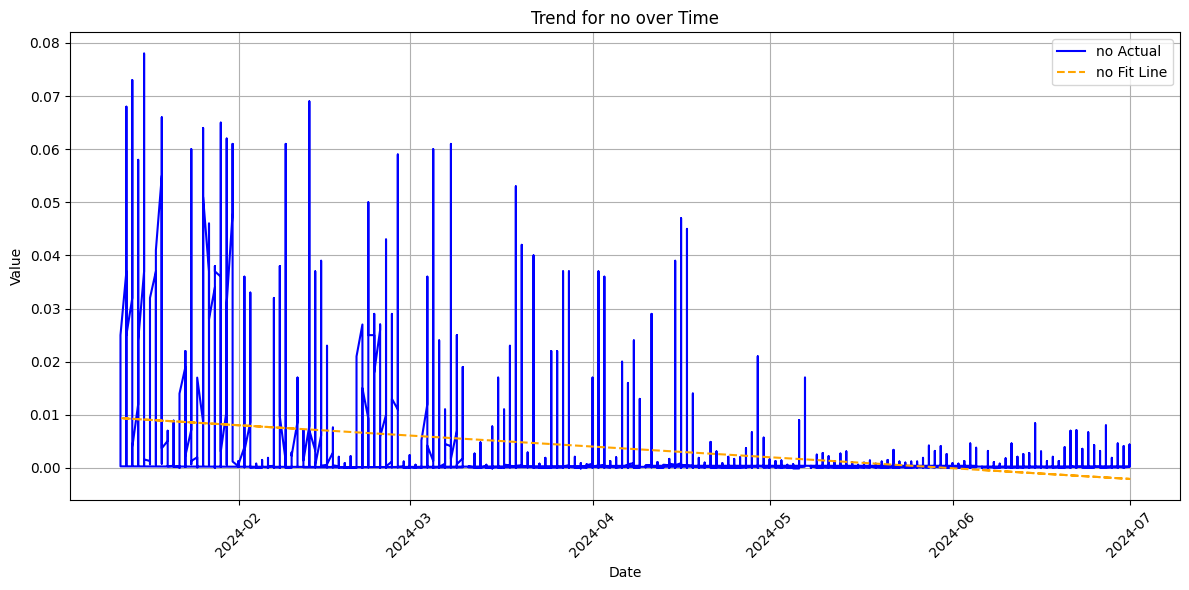

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/1021181035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date_ordinal'] = subset['date_only'].map(pd.Timestamp.toordinal)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/1021181035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['value_pred'] = model.predict(X)


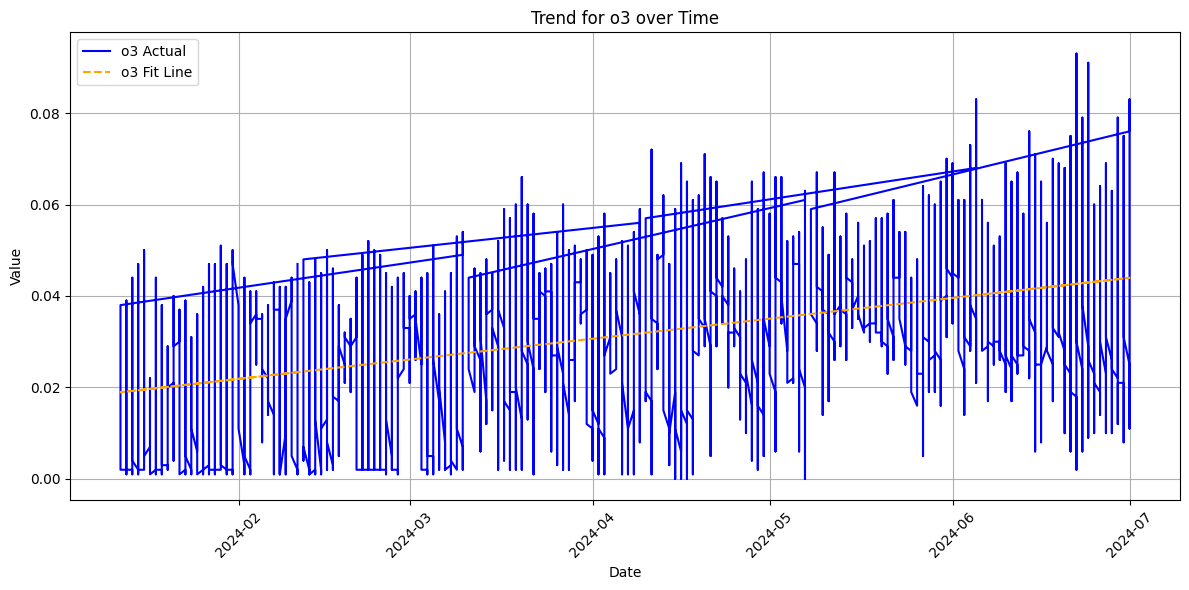

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/1021181035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date_ordinal'] = subset['date_only'].map(pd.Timestamp.toordinal)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/1021181035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['value_pred'] = model.predict(X)


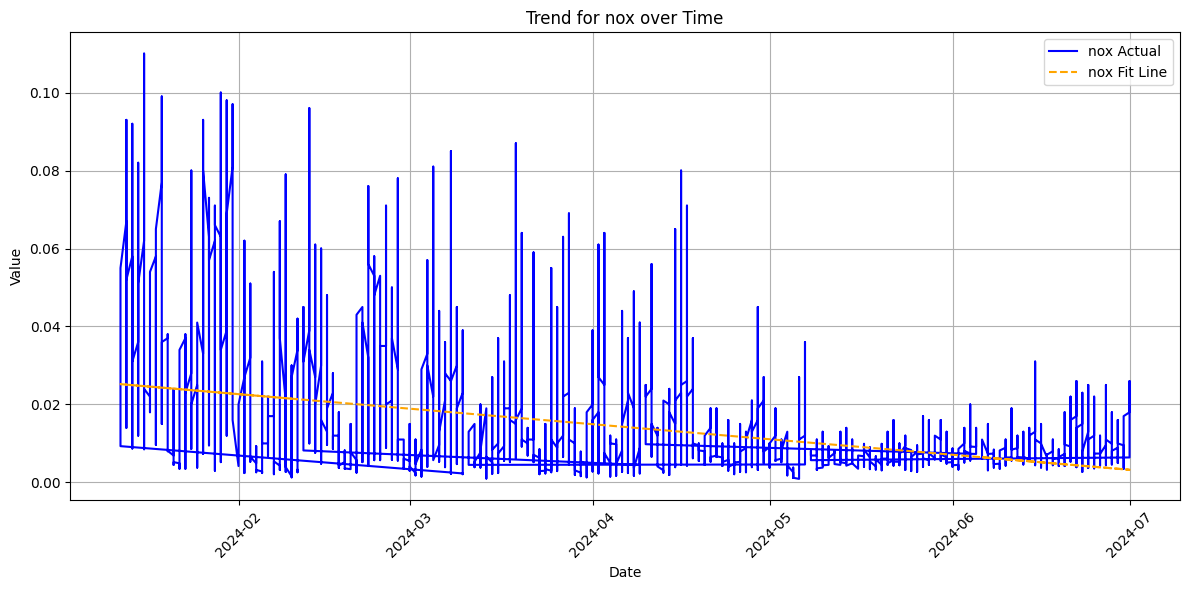

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/1021181035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date_ordinal'] = subset['date_only'].map(pd.Timestamp.toordinal)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_6499/1021181035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['value_pred'] = model.predict(X)


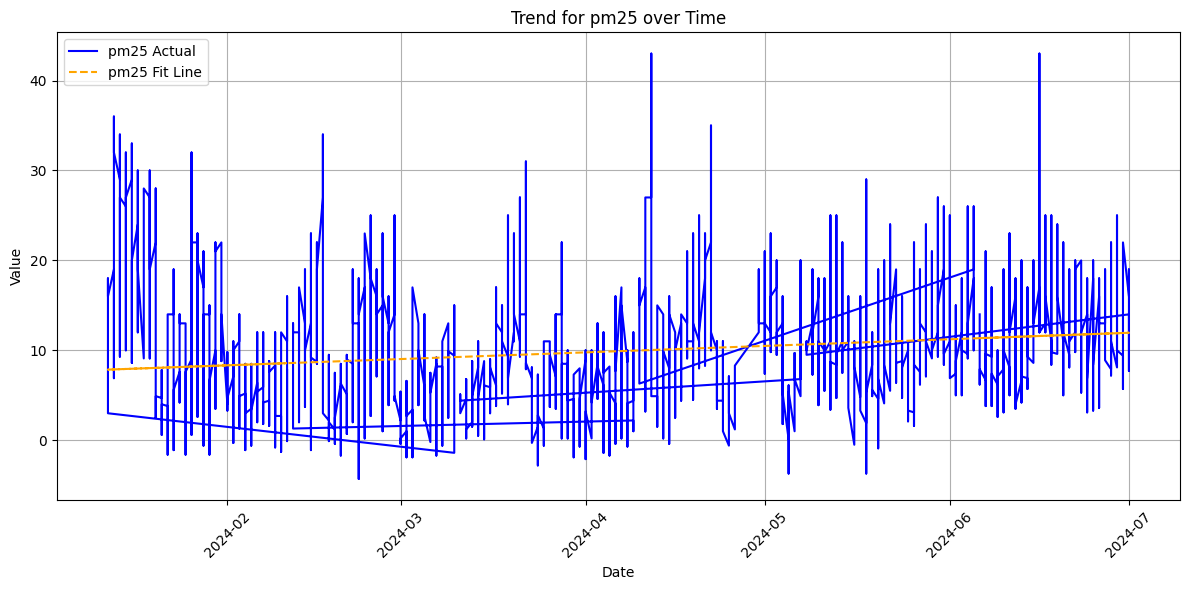

In [953]:
for param in df['parameter'].unique():
    subset = df[df['parameter'] == param]
    subset['date_ordinal'] = subset['date_only'].map(pd.Timestamp.toordinal)

    X = subset[['date_ordinal']]
    y = subset['value']

    model = LinearRegression()
    model.fit(X, y)
    subset['value_pred'] = model.predict(X)

    plt.figure(figsize=(12, 6))
    plt.plot(subset['date_only'], subset['value'], label=f'{param} Actual', color='blue')
    plt.plot(subset['date_only'], subset['value_pred'], label=f'{param} Fit Line', color='orange', linestyle='--')
    plt.title(f'Trend for {param} over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
